 # TP : découverte des arbres de décision
---

|   |   |   |
|---|---|---|
|  | | <img src="https://perso.isima.fr/~yjdaniel/cours/resources/arbre.png" width="500" height="300" /> |


---
# Introduction
- Vous pouvez (hmmm devez ?) ajouter des blocs de code comme des blocs d'explication.
- Pensez à sauvegarder régulièrement
- Il est posible de créer une copie locale de votre travail ```file / Download Notebook```. Il est alors possible de travailler en local après avoir installé un serveur Jupyter ainsi que les bibliothèques nécessaires.

Les principaux points abordés dans ce TP sont :
- La construction des ensembles à manipuler (apprentissage, validation, test)
- La visualisation des données
- Le choix des critères de séparation pour la création d'un arbre de décision
  + cas où la séparation peut s'effectuer sur un unique attribut
  + cas où la sépararation est linéaire, mais doit faire intervenir plusieurs attributs
- La construction de l'arbre
- Le jugement de la qualité de l'apprentissage
- Découverte de sklearn
- Introduction aux 'random forests'

---
---
# Avant l'apprentissage
---
---

---
# Préparation de l'environnement

## Charger les librairies 
- numpy
- pandas
- seaborn
- matplotlib.pyplot

In [1]:
# Charger les bibliothèques demandées
import  numpy as np
import  pandas as pd
import  seaborn as sns
import  matplotlib.pyplot as plt

 ## Charger la base de données 'Student alcohol consumption' dans l'environnement
 - Commencer par incorporer la BD dans le kernel : *add data* dans la 'frame' de droite
 - Utiliser la commande pandas permettant de charger le fichier CSV student-mat des données (attention à l'indexage !)
 - N'oubliez pas de vérifier l'apparence du résultat en affichant les premières lignes
 
Rappel : les données se trouvent dans "../input/", dont on peut lister le contenu par :
 ```
import os
print(os.listdir("../input/"))
```
 

In [2]:
# Charger la BD 
import os

fichier = pd.read_csv('../input/student-alcohol-consumption/student-mat.csv')
display(fichier.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


---
# Découverte et préparation de la base
- Lister les 3 premières lignes (préférer```display```  à ```print```)

In [3]:
# Réaliser les premiers affichages
display(fichier.head(3))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


- Afficher le nombre de lignes ainsi que le nombre de colonnes

In [4]:
print('NbLigne =',fichier.shape[0],'Nbcolonnes =',fichier.shape[1])

NbLigne = 395 Nbcolonnes = 33


- Afficher les types des attributs + nombre de données manquantes par attribut

In [5]:
#display((fichier.dtypes),display(fichier.isnull().sum()))
display((fichier.dtypes),fichier.isnull().sum())

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

- Afficher un résumé statistique simple de cette base

In [6]:
fichier.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
#display((fichier.dtypes),display(fichier.isnull().sum())).describe()

- Pour chaque attribut non continu, lister les valeurs possibles

In [8]:
def valeurs_non_continu(data):
    n_cont = data.dtypes == 'object'
    for k,v in n_cont.items():
        if v == True:
            display(k,data[k].unique())
            print("")

valeurs_non_continu(fichier)

'school'

array(['GP', 'MS'], dtype=object)

'sex'

array(['F', 'M'], dtype=object)

'address'

array(['U', 'R'], dtype=object)

'famsize'

array(['GT3', 'LE3'], dtype=object)

'Pstatus'

array(['A', 'T'], dtype=object)

'Mjob'

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

'Fjob'

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

'reason'

array(['course', 'other', 'home', 'reputation'], dtype=object)

'guardian'

array(['mother', 'father', 'other'], dtype=object)

'schoolsup'

array(['yes', 'no'], dtype=object)

'famsup'

array(['no', 'yes'], dtype=object)

'paid'

array(['no', 'yes'], dtype=object)

'activities'

array(['no', 'yes'], dtype=object)

'nursery'

array(['yes', 'no'], dtype=object)

'higher'

array(['yes', 'no'], dtype=object)

'internet'

array(['no', 'yes'], dtype=object)

'romantic'

array(['no', 'yes'], dtype=object)

- Remplacer les colonnes G1, G2, G3 par une nouvelle colonne G, valant la moyenne de G1, G2, G3

In [9]:
columns_list = ['G1', 'G2','G3']

fichier['G']=fichier[columns_list].sum(axis=1) 
fichier['G1']=fichier.G/3
fichier['G2']=fichier.G/3
fichier['G3']=fichier.G/3
fichier
 # ici la colone classe est G 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5.666667,5.666667,5.666667,17
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5.333333,5.333333,5.333333,16
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,8.333333,8.333333,8.333333,25
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,14.666667,14.666667,14.666667,44
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,8.666667,8.666667,8.666667,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9.000000,9.000000,9.000000,27
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,15.333333,15.333333,15.333333,46
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,8.333333,8.333333,8.333333,25
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11.000000,11.000000,11.000000,33


- Remplacer les valeurs de G en suivant la règle suivante :
  - $x <8$ --> "A"
  - $8 \leq x<10$ --> "B"
  - $10 \leq x <13$ --> "C"
  - $13 \leq x<16$ --> "D"
  - $ x \geq 16$ --> "E"

In [10]:

def test (g):
    if g<8:
        return 'A'
    elif g>=8 and g <10:
        return 'B'
    elif g>= 10 and g<13:
        return 'C'
    elif g>= 13 and g<16:
        return 'D'
    elif g>= 16:
        return 'E'
    
fichier['G'] = fichier['G'].apply(test)
#fichier.loc[fichier.G.apply(test), 'G']
fichier

# cette exercice ma couter beaucoup en reflexion ;)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5.666667,5.666667,5.666667,E
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5.333333,5.333333,5.333333,E
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,8.333333,8.333333,8.333333,E
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,14.666667,14.666667,14.666667,E
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,8.666667,8.666667,8.666667,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9.000000,9.000000,9.000000,E
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,15.333333,15.333333,15.333333,E
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,8.333333,8.333333,8.333333,E
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11.000000,11.000000,11.000000,E


In [11]:
#fichier.loc[fichier.G>8 and fichier.G<10  'G']='A'

- Compter le nombre de ligne pour chacune des valuations possibles de l'attribut "G". Dans la suite, le but du TP sera de prédir en fonction es autres attributs la valeur de l'attribut G.

In [12]:
print("Nb lignes = ",fichier['G'].shape[0])

Nb lignes =  395


- Calculer l'effectif de chacune des classes

In [13]:
fq = fichier["G"].value_counts()
display(fq)

E    365
D     10
C     10
A      8
B      2
Name: G, dtype: int64

# Séparation de la base de données
- Lire le manuel de ```sklearn.model_selection.train_test_split```
  - Examiner en particulier l'option stratify, il faudra la mettre en oeuvre
  - Se poser la question de l'intérêt de random_state
- A l'aide de cette séparer la base de données en trois ensembles :
    - base d'apprentissage (50% des données) : train_X, train_Y
    - base de validation (25% des données) : validation_X, validation_Y
    - base de test (25% des données) : test_X, test_Y
- Rappeler la fonction de chacune de ces bases.

!!! Dans la suite, choisir avec attention sur quelle base les opérations doivent être réalisées !!!

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y = fichier.G
features = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
'Walc', 'health', 'absences']
X = fichier[features]
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=
1)
test_X, val_X, test_y, val_y = train_test_split(test_X, test_y, train_size=0.5, random_state=1)

In [16]:
print(train_X.shape)# 50%
print(test_X.shape)#25%
print(val_X.shape)#25%

(197, 30)
(99, 30)
(99, 30)


---
---
# Mise en place manuelle d'un arbre de décision
---
---

In [17]:
import math


#On calcule la fréquence de chaque classe
fq = fichier["G"].value_counts()/1080
display(fq)


#Calcul de l'entropie
def entropy(fq):
    entropy = 0
    for x in fq:
        entropy = entropy + (x * math.log2(x)) #L'entropie
    return -1 * entropy

E    0.337963
D    0.009259
C    0.009259
A    0.007407
B    0.001852
Name: G, dtype: float64

In [18]:
print(" Entropie générale = ", entropy(fq))

 Entropie générale =  0.7232535928817013


<AxesSubplot:title={'center':'Distribution Attribut sex'}, xlabel='G', ylabel='Count'>

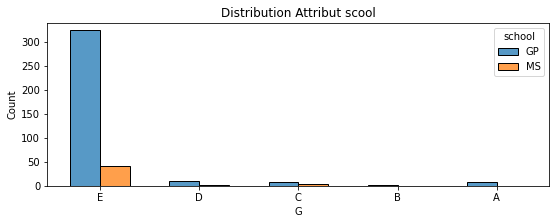

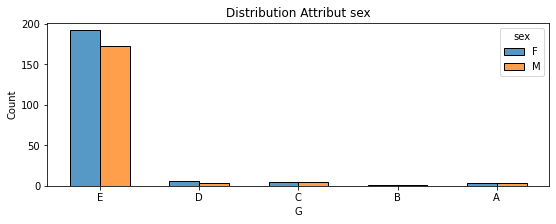

In [19]:
plt.figure(figsize=(9,3))
plt.title("Distribution Attribut scool")
sns.histplot(data=fichier,x='G',hue='school', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution Attribut sex")
sns.histplot(data=fichier,x='G',hue='sex', multiple='dodge', shrink=.6)

---
# Première découpe

<AxesSubplot:title={'center':"Distribution des exemples sur l'attribut Fjob"}, xlabel='G', ylabel='Count'>

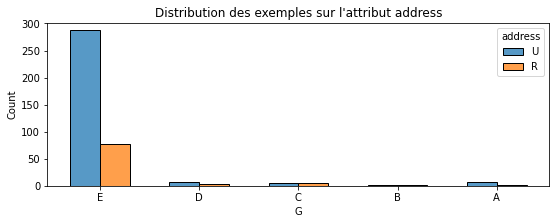

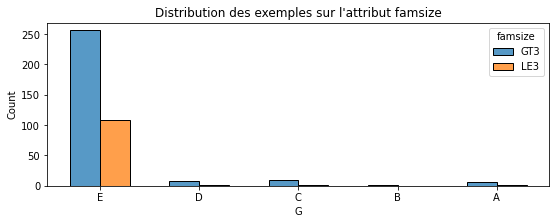

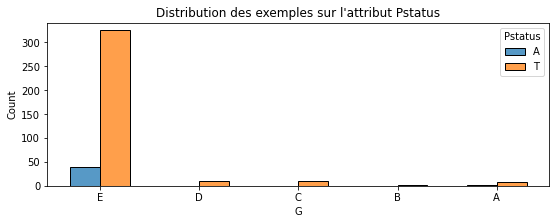

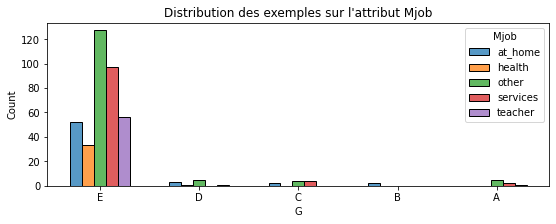

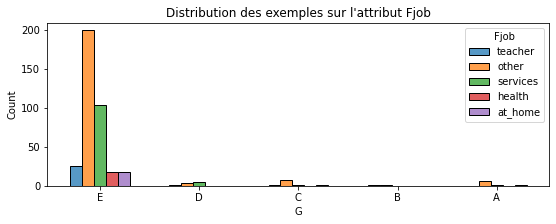

In [20]:
plt.figure(figsize=(9,3))
plt.title("Distribution des exemples sur l'attribut address")
sns.histplot(data=fichier,x='G',hue='address', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution des exemples sur l'attribut famsize")
sns.histplot(data=fichier,x='G',hue='famsize', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution des exemples sur l'attribut Pstatus")
sns.histplot(data=fichier,x='G',hue='Pstatus', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution des exemples sur l'attribut Mjob")
sns.histplot(data=fichier,x='G',hue='Mjob', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution des exemples sur l'attribut Fjob")
sns.histplot(data=fichier,x='G',hue='Fjob', multiple='dodge', shrink=.6)

## Pour chaque attribut
Représenter sur le même graphique la distribution des exemples en fonction de leur classe. On choisira un sns.histplot que l'on configurera au mieux.

<AxesSubplot:title={'center':"Distribution des exemples sur l'attribut internet"}, xlabel='G', ylabel='Count'>

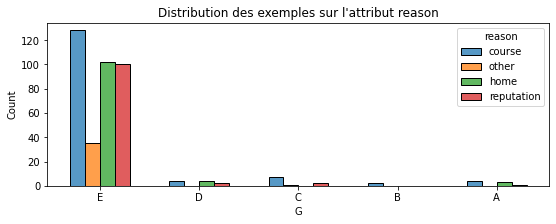

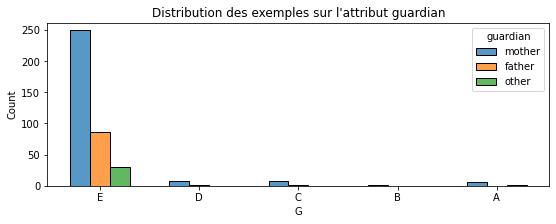

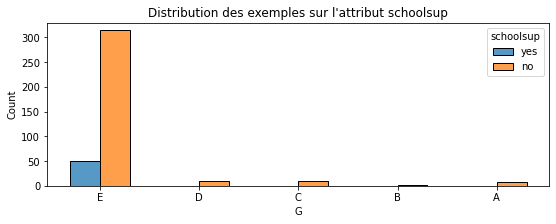

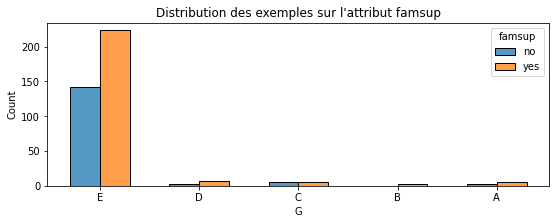

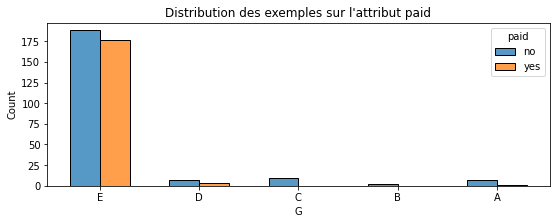

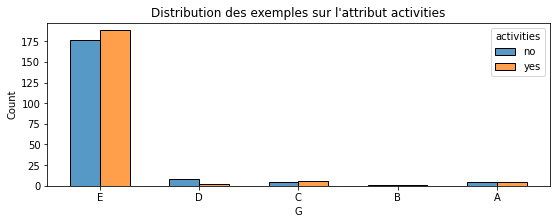

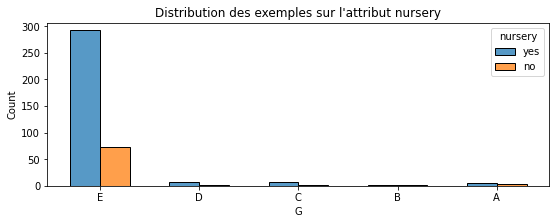

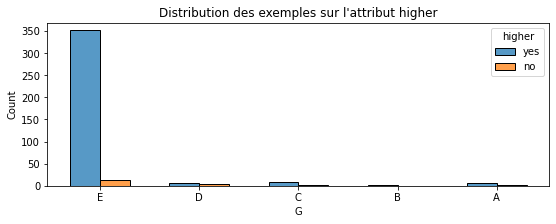

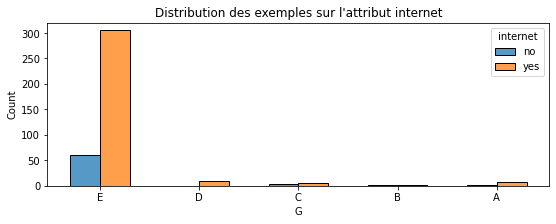

In [21]:
plt.figure(figsize=(9,3))
plt.title("Distribution des exemples sur l'attribut reason")
sns.histplot(data=fichier,x='G',hue='reason', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution des exemples sur l'attribut guardian")
sns.histplot(data=fichier,x='G',hue='guardian', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution des exemples sur l'attribut schoolsup")
sns.histplot(data=fichier,x='G',hue='schoolsup', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution des exemples sur l'attribut famsup")
sns.histplot(data=fichier,x='G',hue='famsup', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution des exemples sur l'attribut paid")
sns.histplot(data=fichier,x='G',hue='paid', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution des exemples sur l'attribut activities")
sns.histplot(data=fichier,x='G',hue='activities', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution des exemples sur l'attribut nursery")
sns.histplot(data=fichier,x='G',hue='nursery', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution des exemples sur l'attribut higher")
sns.histplot(data=fichier,x='G',hue='higher', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution des exemples sur l'attribut internet")
sns.histplot(data=fichier,x='G',hue='internet', multiple='dodge', shrink=.6)


- Analyser les conséquences sur chacun des graphiques de réaliser un arbre de décision dont la racine utiliserait cet attribut afin de réaliser la première séparation.
Exemple : Si on séparait sur le critère de l'école, 
   - les deux branches seraient d'effectifs très déséquilibrées
   - on aurait peu d'informations nouvelle sur les 'GP' (la plus nombreuse)
   - sur les 'MS' la proportion de 'C' aurait augmenté par rapport à toutes les autres classes, et en particulier les proportions de B C E auraient particulièrement baissé.

- Choisir un attribut et une façon de scinder en deux cet attribut, par exemple :
Je choisi l'attribut 'activities freetime' car .... le côté gauche est défini par $\leq 4$ et le côté droit par $>4$

- Créer deux nouveau dataframes 'd0' et 'd1' correspondant respectivement aux exemples du côté gauche et au exemples du côté droit.

In [22]:
d0 = fichier.loc[fichier.activities == 'no']
d1 = fichier.loc[fichier.activities == 'yes']

---
# Niveau suivant de l'arbre
- Reprendre les graphiques en se limitant à la base 'd0', qui devra alors être découpée en 'd00' et 'd01'
- Reprendre les graphiques en se limitant à la base 'd1', qui devra alors être découpée en 'd10' et 'd11'

<AxesSubplot:title={'center':"Distribution des exemples sur l'attribut scool"}, xlabel='G', ylabel='Count'>

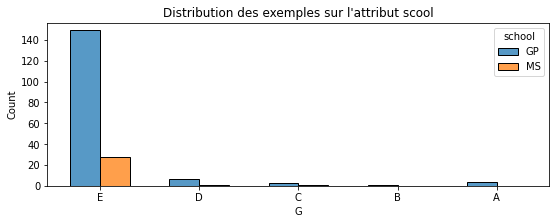

In [23]:
plt.figure(figsize=(9,3))
plt.title("Distribution des exemples sur l'attribut scool")
sns.histplot(data=d0,x='G',hue='school', multiple='dodge', shrink=.6)

<AxesSubplot:title={'center':'Distribution Attribut Fjob'}, xlabel='G', ylabel='Count'>

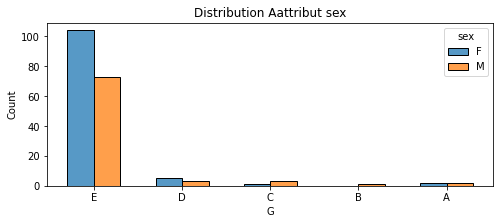

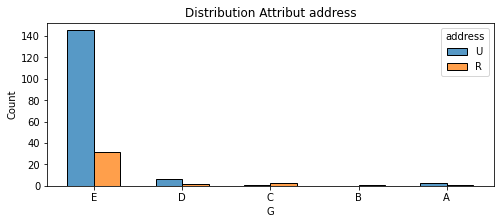

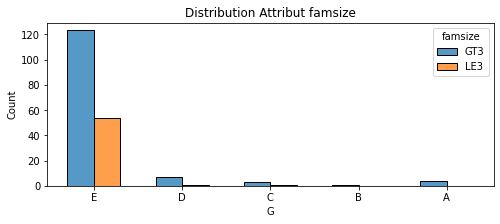

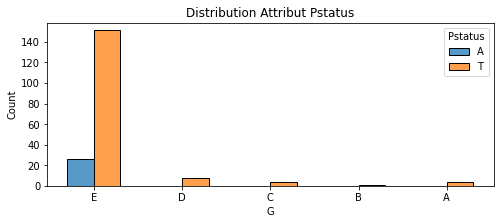

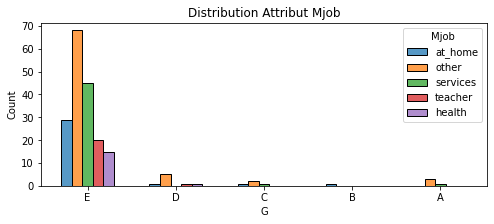

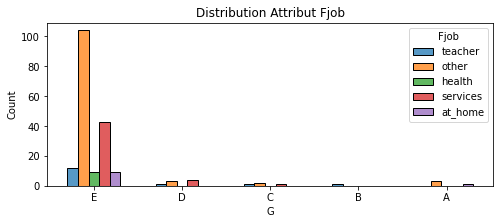

In [24]:
plt.figure(figsize=(8,3))
plt.title("Distribution Aattribut sex")
sns.histplot(data=d0,x='G',hue='sex', multiple='dodge', shrink=.6)
plt.figure(figsize=(8,3))
plt.title("Distribution Attribut address")
sns.histplot(data=d0,x='G',hue='address', multiple='dodge', shrink=.6)
plt.figure(figsize=(8,3))
plt.title("Distribution Attribut famsize")
sns.histplot(data=d0,x='G',hue='famsize', multiple='dodge', shrink=.6)
plt.figure(figsize=(8,3))
plt.title("Distribution Attribut Pstatus")
sns.histplot(data=d0,x='G',hue='Pstatus', multiple='dodge', shrink=.6)
plt.figure(figsize=(8,3))
plt.title("Distribution Attribut Mjob")
sns.histplot(data=d0,x='G',hue='Mjob', multiple='dodge', shrink=.6)
plt.figure(figsize=(8,3))
plt.title("Distribution Attribut Fjob")
sns.histplot(data=d0,x='G',hue='Fjob', multiple='dodge', shrink=.6)

<AxesSubplot:title={'center':'Distribution Attribut nursery'}, xlabel='G', ylabel='Count'>

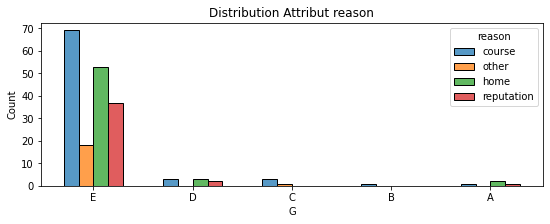

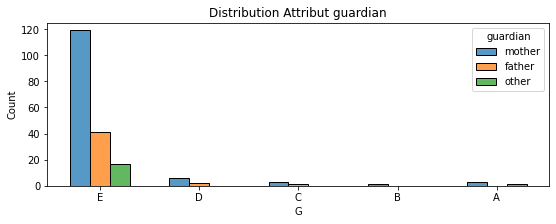

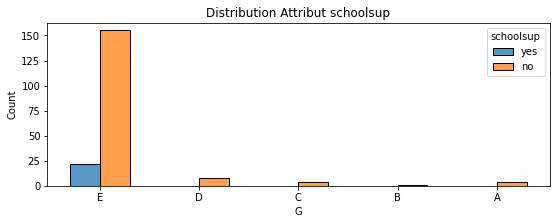

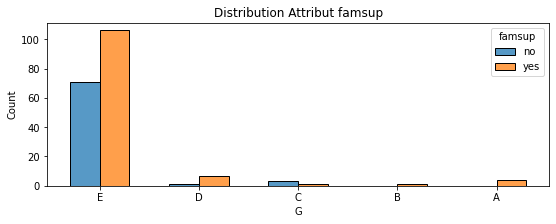

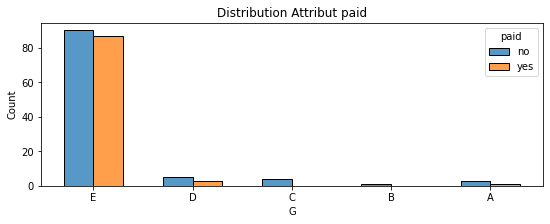

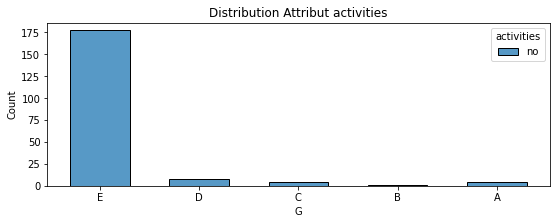

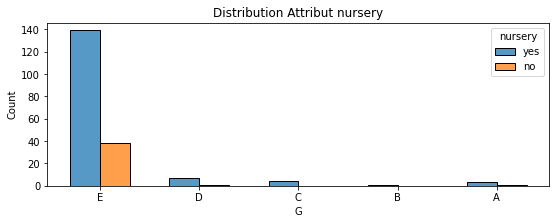

In [25]:
plt.figure(figsize=(9,3))
plt.title("Distribution Attribut reason")
sns.histplot(data=d0,x='G',hue='reason', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution Attribut guardian")
sns.histplot(data=d0,x='G',hue='guardian', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution Attribut schoolsup")
sns.histplot(data=d0,x='G',hue='schoolsup', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution Attribut famsup")
sns.histplot(data=d0,x='G',hue='famsup', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution Attribut paid")
sns.histplot(data=d0,x='G',hue='paid', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution Attribut activities")
sns.histplot(data=d0,x='G',hue='activities', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution Attribut nursery")
sns.histplot(data=d0,x='G',hue='nursery', multiple='dodge', shrink=.6)

<AxesSubplot:title={'center':'Distribution Attribut romantic'}, xlabel='G', ylabel='Count'>

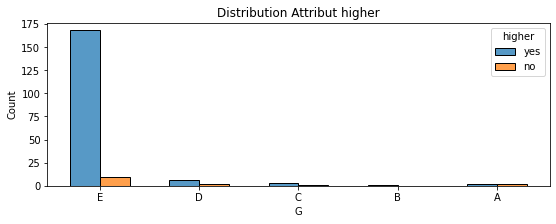

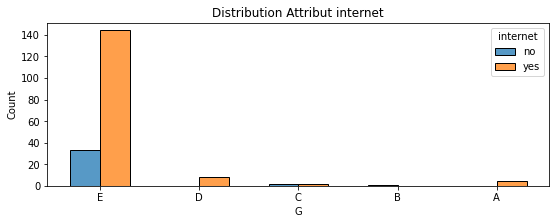

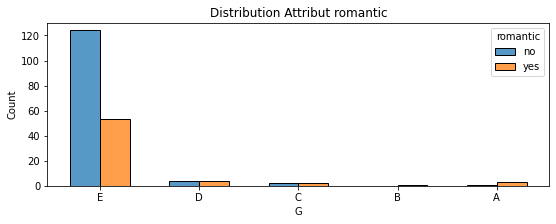

In [26]:
plt.figure(figsize=(9,3))
plt.title("Distribution Attribut higher")
sns.histplot(data=d0 ,x='G',hue='higher', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution Attribut internet")
sns.histplot(data=d0 ,x='G',hue='internet', multiple='dodge', shrink=.6)
plt.figure(figsize=(9,3))
plt.title("Distribution Attribut romantic")
sns.histplot(data=d0,x='G',hue='romantic', multiple='dodge', shrink=.6)

---
# Fonction de découpe
- Ecrire une fonction qui attribue à une ligne du dataframe 'train' l'ensemble auquel cet élément est assigné, parmi 'd00, d01, d10, d11' (ce sont les feuilles de notre arbdre de décision)
- Déterminer la classe la plus fréquente dans chacun des ensembles 'd00, d01, d10, d11'
- Ecrire une fonction qui associe à une ligne du dataframe la classe majoritaire de l'ensemble auquel il est affecté

In [27]:
def E_assigne(data,line):
    
    look = data.iloc[line,:]
    if(look['activities'] == 'no'):
        if(look['paid'] == 'no'):
            ensemble = 'd00'
        elif(look['paid'] == 'yes'):
            ensemble = 'd01'
        else:
            ensemble = 'rien trouvé'
    elif(look['activities'] == 'yes'):
            if(look['paid'] == 'yes'):
                ensemble = 'd10'
            elif(look['paid'] == 'no'):
                ensemble = 'd11'
            else:ensemble ='rien trouvé'
    return ensemble

In [28]:
print("Cette ligne appartient à " + E_assigne(train_X,9))

Cette ligne appartient à d01


In [29]:
def associe_classe(df,s_sets,ligne):
    ensemble = ensemble_assigne(df,ligne)
    ensemble = subsets[ensemble]
    classe = classe_la_plus_frequente(ensemble)
    print("la classe majoritaire pour cette ligne est: " + classe)
#Classe majoritaire associé à une ligne du Dataframe

---
# Qualité de l'arbre
- Sachant que  nous allons essayer d'autres façons de réaliser l'apprentissage, sur quel ensemble doit-on réaliser la mesure de la qualité de l'arbre ainsi créé ?
- On choisit comme mesure de qualité le taux de bonnes prédictions (accuracy), le calculer.
- représenter la matrice de confusion

In [30]:
from sklearn import tree

---
# Arbre de décision réalisés par sklearn
---
- importer le module ```tree``` de ```sklearn```
- Etudier la documentation de ```DecisionTreeClassifier```, en particulier la partie **Tips on practical use**
- Construire un classifieur utilisant l'indice de Gini

Attention : actuellement, les arbres de décision de sklearn ne supportent que les données numériques, il  faudra donc réaliser un prétraitement sur les données afin de transformer les attributs catégoriels en attributs numériques.

# Qualité

- calculer la matrice de confusion
- calculer les scores usuels de ce classifieur
- à l'aide de la fonction ```plot_confusion_matrix``` de sklearn, représenter graphiquement la matrice de confusion
- Comparer les scores à ceux obtenus par un classifieur 'bidon' (sklearn.dummy) (à quoi cela sert-il ?)

Rq : il reste un bug dans dummy, si vous obtenez une erreur de type 'no argmax on list', un contournement de ce problème peut être obtenu en reformattant les entrées du classifieur par 'check_X_y'


---
# Comparaison avec un classifieur primitif
Entrainer un 'dummy' classifieur (```sklearn.dummy.DummyClassifier```), et comparer les mesures du classifieur précédent à ce nouveau classifieur

---
# Représenter un arbre de décision
- Importer le module graphviz
- utiliser la fonction de ```tree.export_graphviz``` puis ```graphviz.Source``` afin de réaliser une belle représentation graphique de l'arbre de décision

---
# Construction du 'meilleur' arbre de décision
- faire varier les paramètres de construction de l'arbre de décision (bien mettre en pratique les 'Tips')
- choisir l'arbre le 'meilleur' sur l'ensemble de test  

N'oubliez pas le principe du ** rasoir d'Ockham ** pour effectuer votre choix !!!!!

---
# Random Forest
---
- Rappeler le principe des forets d'arbres décisionnelles, statquest est votre ami ! 
    - https://www.youtube.com/watch?v=J4Wdy0Wc_xQ
    - https://www.youtube.com/watch?v=nyxTdL_4Q-Q

- Remplacer le classifieur par arbre de décision par un classifieur par une forêt d'arbres décisionnels

---
# Livraison
---
Faire les tests finaux afin de connaître la qualité de votre apprentissage, en reprenant les différentes mesures, mais cette fois sur l'ensemble de test.

# Merci d'être allé jusqu'à la fin du TP, j'espère que ce travail vous a aidé à approfondir votre compréhension du cours d'apprentissage artificiel.